## Deliverable 3: Optimize the Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Optimize your model in order to achieve a target predictive accuracy higher than 75% by using any or all of the following:
1. Adjusting the input data to ensure that there are no variables or outliers that are causing confusion in the model, such as:
* Dropping more or fewer columns.
* Creating more bins for rare occurrences in columns.
* Increasing or decreasing the number of values for each bin.
2. Adding more neurons to a hidden layer.
3. Adding more hidden layers.
4. Using different activation functions for the hidden layers.
5. Adding or reducing the number of epochs to the training regimen.

In [2]:
# Will drop ONLY ID column 'EIN', keeping 'NAME' for analysis
application_df.drop('EIN', axis = 1, inplace = True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Determine the number of unique values in each column of application_not_cat.
application_not_cat = application_df.dtypes[application_df.dtypes != "object"].index.tolist()
application_df[application_not_cat].nunique()

STATUS              2
ASK_AMT          8747
IS_SUCCESSFUL       2
dtype: int64

In [5]:
# Determine the number of unique values in each column of application_cat.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [6]:
# Look at NAME value counts for binning
Names = application_df["NAME"].value_counts()
Names

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [7]:
# Replace values under 50
replace_Names = list(Names[Names < 50].index)

# Replace in DataFrame
for Names in replace_Names:
    application_df["NAME"] = application_df["NAME"].replace(Names, "Other")
    
# check to make sure binning was successful
application_df["NAME"].value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

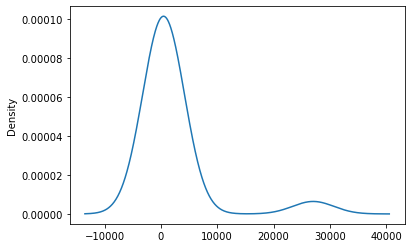

In [9]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [10]:
# Before I used 1,000, will use 500 this time
replace_application = list(application_type[application_type < 500].index)

# Replace in dataframe
for item in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(item,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classification_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

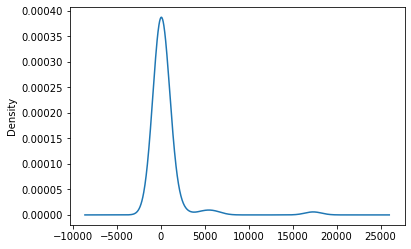

In [12]:
# Visualize the value counts of CLASSIFICATION
classification_value_counts.plot.density()

In [13]:
# Before I used 1,000, will use 500 this time
replace_class = list(classification_value_counts[classification_value_counts < 500].index)

# Replace in dataframe
for item in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(item, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DEMOLAY INTERNATIONAL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

/Users/luispsalazar/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Deliverable 2: Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = (number_input_features * 2)
hidden_nodes_layer2 = (number_input_features * 1)
hidden_nodes_layer3 = (number_input_features * 0.5)

nn_optimized = tf.keras.models.Sequential()

# First hidden layer
nn_optimized.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="tanh")
)

# Second hidden layer
nn_optimized.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="tanh")
)

2022-06-02 21:52:42.961908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
print(number_input_features)
print(hidden_nodes_layer1)
print(hidden_nodes_layer2)
print(hidden_nodes_layer3)

96
192
96
48.0


In [22]:
# Third hidden layer
nn_optimized.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="tanh"
))

In [23]:
# Output layer
nn_optimized.add(tf.keras.layers.Dense(
    units=1, 
    activation="tanh"
))

In [24]:
# Check the structure of the model
nn_optimized.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               18624     
                                                                 
 dense_1 (Dense)             (None, 96)                18528     
                                                                 
 dense_2 (Dense)             (None, 48)                4656      
                                                                 
 dense_3 (Dense)             (None, 1)                 49        
                                                                 
Total params: 41,857
Trainable params: 41,857
Non-trainable params: 0
_________________________________________________________________


In [25]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok = True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model
nn_optimized.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    save_freq = 4000)

In [28]:
# Train the model
fit_model = nn_optimized.fit(X_train_scaled,y_train,epochs=100, callbacks = [cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 1.4605 - accuracy: 0.7142
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.8317 - accuracy: 0.7467
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.8095 - accuracy: 0.7565
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.8448 - accuracy: 0.7489
Epoch 5/100
765/804 [===========================>..] - ETA: 0s - loss: 0.8055 - accuracy: 0.7471
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.8071 - accuracy: 0.7479
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.7630 - accuracy: 0.7480
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6784 - accuracy: 0.7562
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6637 - accuracy: 0.7629
Epoch 9/100
804/804 [==============================] -

539/804 [===================>..........] - ETA: 0s - loss: 0.4963 - accuracy: 0.7772
Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4954 - accuracy: 0.7748
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5203 - accuracy: 0.7587
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5191 - accuracy: 0.7734
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5415 - accuracy: 0.7667
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5057 - accuracy: 0.7664
Epoch 70/100
488/804 [=================>............] - ETA: 0s - loss: 0.4866 - accuracy: 0.7764
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4975 - accuracy: 0.7739
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4969 - accuracy: 0.7731
Epoch 72/100
804/804 

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5532 - accuracy: 0.7610 - 369ms/epoch - 1ms/step
Loss: 0.5532487630844116, Accuracy: 0.7610495686531067


In [30]:
# Export our model to HDF5 file
nn_optimized.save("AlphabetSoupCharityOptimized.h5")

<AxesSubplot:>

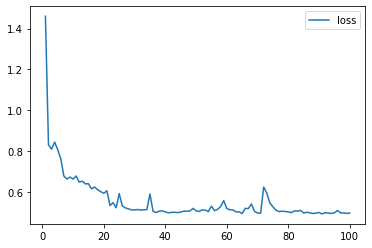

In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

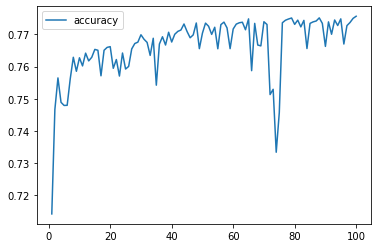

In [32]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Random Forest Model

In [33]:
# Import additional dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.2f}")

 Random forest predictive accuracy: 0.75


In [35]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2565, 1472],
       [ 714, 3824]])

In [36]:
# print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      4037
           1       0.72      0.84      0.78      4538

    accuracy                           0.75      8575
   macro avg       0.75      0.74      0.74      8575
weighted avg       0.75      0.75      0.74      8575

